# Advanced Exploratory Data Analysis (EDA) in Python <br />  <hr style="border:4.5px solid #108999"> </hr>


# Introduction

Exploratory Data Analysis (EDA) is becoming inherently familiar with a new dataset, summarising the main characteristics of the dataset. This involves exploring dataframes and plotting various aspects of the dataset to get a visual representation of the dataset. This step is vitally important for the analysis of the dataset. It can be challenging and time consuming. However, an in-depth and broad EDA can help a lot to understand your dataset. especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

This NB will explore multiple useful EDA routines. However, to keep things short and compact it might not always dig deeper or explain all of the implications. But, spending enough time on a proper EDA to fully understand a dataset is a key part of any good data science project.

>> As a rule of thumb, you probably will spend 80% of your time in data preparation and exploration and only 20% in actual machine learning modeling.

**How to perform Exploratory Data Analysis ?**

Now this is the question everyone wnats to know the answer to. In fact, it's a bit more complicated but ultimately it is very much data driven and depends on the overall question you are trying to solve. There is no one method or common methods in order to perform EDA, whereas in this Medium article you will be able to understand some common methods and plots that would be used in the EDA process.

**What data are we exploring today ?**

While doing some research into EDA analyses I stumbled across this Kaggle dataset of cars.

</b>The data-set can be downloaded from [here](https://www.kaggle.com/CooperUnion/cardataset). To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this tutorial, we will explore the data and make it ready for modeling.

___

<a id="t1."></a>
## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

<a id="t2."></a>
## 2. Get the Data

Using Pandas we can load the data from a .CSV file into a data frame.

If you would like to install the data  directly from Kaggle you can use: `pip install Kaggle` or `conda install Kaggle`

Otherwise download the data manually and load in the dataset using: `df = pd.read_csv("data.csv")`

### Downloading the data directly from Kaggle using the API:

Kaggle API requires an API token. Go to the Account Tab ( `https://www.kaggle.com/<username>/account`) and click ‘Create API Token’.  A file named kaggle.json will be downloaded. Move this file in to `~/.kaggle/` folder in Mac and Linux or to `C:\Users\<username>\.kaggle\`  on windows. This is required for authentication and do not skip this step.

In [18]:
# Initializing and Authenticating With API Server

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

You can set the path to where you want the folder to be downlaoded

In [49]:
# api.dataset_download_file('CooperUnion/cardataset', 'data.csv')
api.dataset_download_files('CooperUnion/cardataset', path=None, force=False, quiet=True, unzip=True)

In [52]:
df = pd.read_csv("data.csv")
# To display the top 5 rows 
df.head(5)  

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [53]:
df.tail(5) # To display the botton 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## 3. Checking the types of data

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer. To do this we will be suing dummy coding. Once we have integer values we will be able to plot and visualise the data. Here, in this case, the data is already in integer format so nothing to worry.

In [54]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 4. Dropping irrelevant columns

To is common practice in EDA to remove (drop) redundant columns from dataframe. In this pipline we will remove Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size.

In [55]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 5. Renaming the columns

In this instance, most of the column names are much too long making is difficult to visualise in the table, while some are rather confusing. Here we'll cgnage some column names to something shorter but meaningful. Overall this improves the readability of the data set.

In [56]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 6. Structure of numerical features

Next, take a closer look at the numerical features. More precisely, investigate how many unique values each of these feature has. This process will give some insights about the number of **binary** (2 unique values), **ordinal** (3 to ~10 unique values) and **continuous** (more than 10 unique values) features in the dataset.

In [72]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include='number').nunique().sort_values()

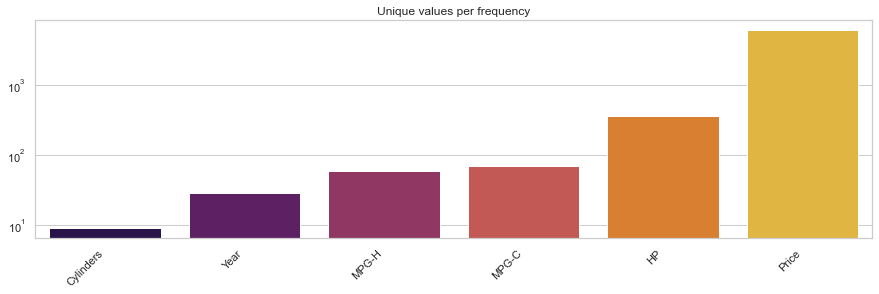

In [73]:
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()


## 7. Dropping the duplicate rows

Duplicates are entries that represent the same sample point multiple times. For example, if a measurement was registered twice by two different people. Detecting such duplicates is not always easy, as each dataset might have a unique identifier (e.g. an index number or recording time that is unique to each new sample) which you might want to ignore first.

In [57]:
df.shape

(11914, 10)

In [64]:
n_duplicates = df.duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 989 duplicates in your database.


To handle these duplicates you can just simply drop them with `.drop_duplicates()`.

In [65]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df.columns

# Drop duplicates based on 'columns_to_consider'
df.drop_duplicates(subset=columns_to_consider, inplace=True)
df.shape

(10925, 10)

In [66]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

## 8. Dropping the missing or null values.

Another quality issue worth to investigate are missing values. Having some missing values is normal. What we want to identify at this stage are big holes in the dataset, i.e. samples or features with a lot of missing values.

In [76]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [68]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include='number').nunique().sort_values()

This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

Text(111.5, 0.5, 'Sample Number')

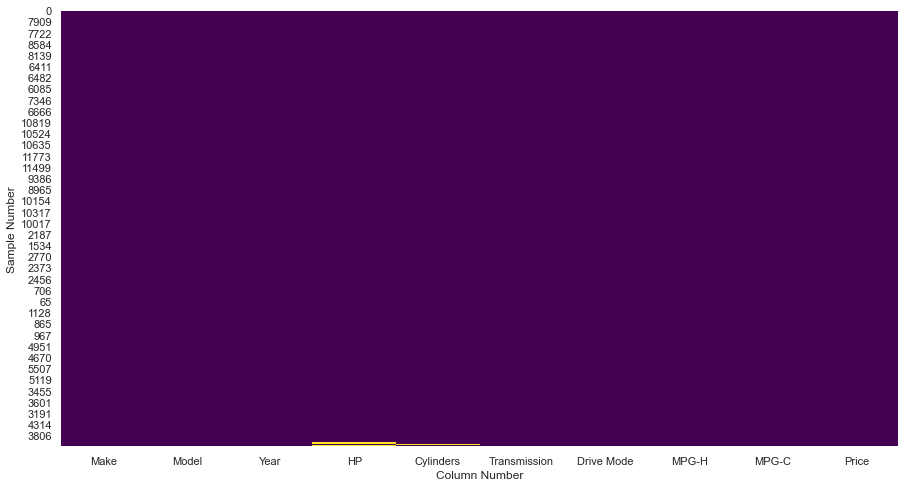

In [75]:
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df.loc[df.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

In [77]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

In [78]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


## 9. Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

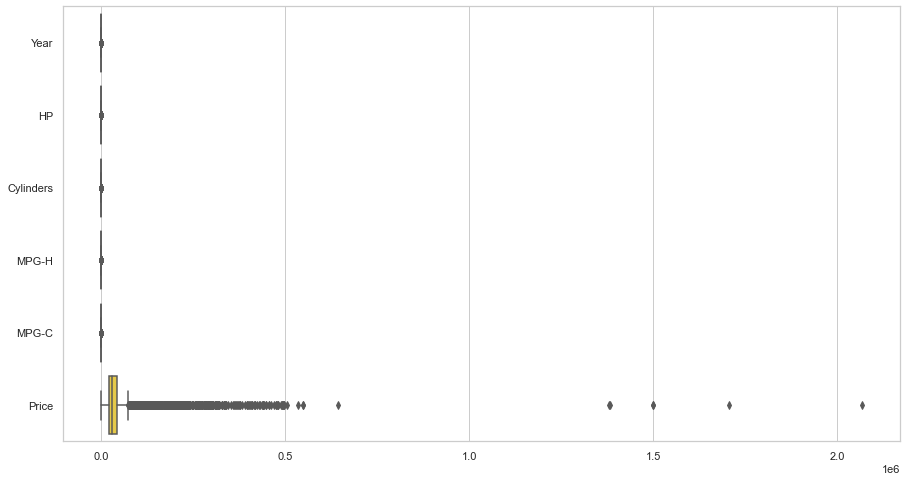

In [85]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=df,orient="h", palette="Set2")

<AxesSubplot:xlabel='Price'>

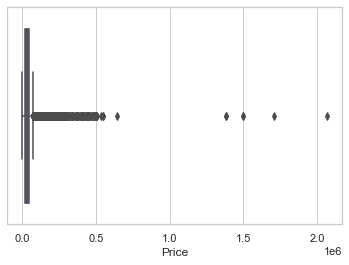

In [91]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='HP'>

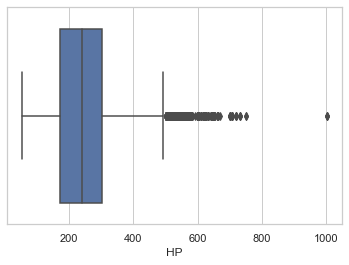

In [80]:
sns.boxplot(x=df['HP'])

<AxesSubplot:xlabel='Cylinders'>

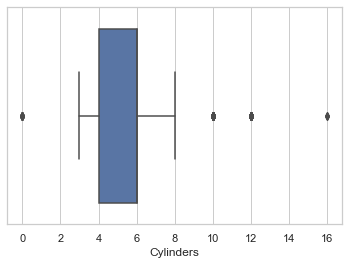

In [81]:
sns.boxplot(x=df['Cylinders'])

In [92]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


Don't worry about the above values because it's not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [93]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

C:\Users\kevin\AppData\Local\Temp\ipykernel_26492\4147643536.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(9191, 10)

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.

## 10. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

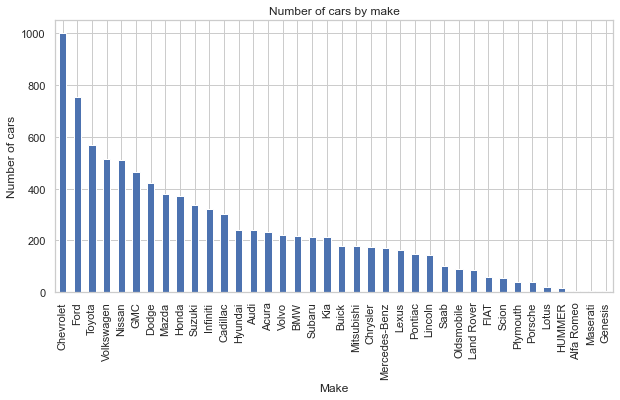

In [143]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [144]:
# Computes feature correlation
df_corr = df.corr(method="pearson")

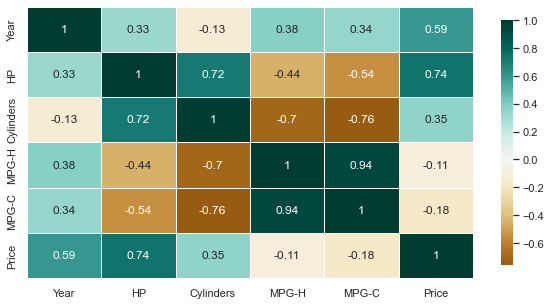

In [181]:
# Plot correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(df_corr, 
            center=0, annot=True, linewidths=.5,
            cmap='BrBG', cbar_kws={"shrink": 0.9});

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

<AxesSubplot:xlabel='HP', ylabel='Price'>

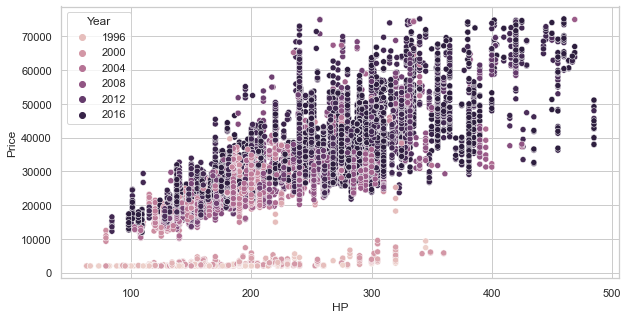

In [187]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="HP", y="Price", hue = 'Year')

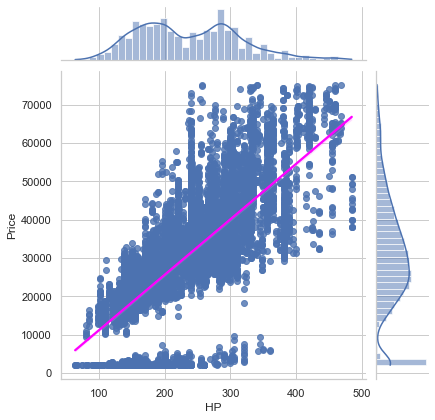

In [195]:
sns.jointplot(x="HP", y="Price", data=df, kind="reg",joint_kws={'line_kws':{'color':'magenta'}});

**Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA. There are many more yet to come but for now, this is more than enough idea as to how to perform a good EDA given any data sets. Stay tuned for more updates.**

## Thank you.